In [16]:
import pandas as pd
import numpy as np
import wfdb
import os
import neurokit2 as nk

In [17]:
database_path = "./mit-bih-arrhythmia-database-1.0.0/"

In [18]:
# Check if expected folder exists
if not os.path.exists(database_path):
    print("Downloading MIT-BIH Arrhythmia database...")
    url = "https://physionet.org/static/published-projects/mitdb/mit-bih-arrhythmia-database-1.0.0.zip"
    download_successful = nk.download_zip(url, database_path)
    if not download_successful:
        raise ValueError(
            "NeuroKit error: download of MIT-Arrhythmia database failed. "
            "Please download it manually from https://alpha.physionet.org/content/mitdb/1.0.0/ "
            "and unzip it in the same folder as this script."
        )

In [1]:
def read_file(file, participant):
    """Utility function updated to extract ECG features including P, Q, S, T peaks, and P onsets, T offsets."""
    signal, fields = wfdb.rdsamp(file[:-4])
    ecg_signal = signal[:, 0]  # Assuming the ECG signal is the first column
    sample_rate = fields['fs']

    print(fields)

    # print the sample rate
    print(f"Sample rate: {sample_rate} Hz, Participant: {participant + 1}/{len(data_files)}")

    # Clean the ECG signal
    cleaned_ecg = nk.ecg_clean(ecg_signal, sampling_rate=sample_rate)

    # Find R-peaks
    _, rpeaks = nk.ecg_peaks(cleaned_ecg, sampling_rate=sample_rate)

    # Delineate the ECG signal
    _, waves = nk.ecg_delineate(cleaned_ecg, rpeaks, sampling_rate=sample_rate, method="peak", show_type="peaks", show=True)

    # Process the entire signal to extract processed signals and related info
    signals, info = nk.ecg_process(cleaned_ecg, sampling_rate=sample_rate)

    analysis = nk.ecg_analyze(signals, sampling_rate=sample_rate)

    # Convert the interval-related features to a DataFrame, ensure it's in the same structure as ecg_features_df
    # interval_related_df = pd.DataFrame(interval_related_features)
    analysis["Participant"] = f"MIT-Arrhythmia_{participant:02d}"
    analysis["Sampling_Rate"] = sample_rate
    analysis["Database"] = "MIT-Arrhythmia-x" if "x_mitdb" in file else "MIT-Arrhythmia"

    # Save the analysis of each participant
    # analysis.to_csv("data/analysis_participant_" + str(participant) + ".csv")

    # Now, `waves` contains the delineated features
    # Prepare the dataframe for other features
    waves = pd.DataFrame({key: [val] for key, val in waves.items()})
    waves["Participant"] = f"MIT-Arrhythmia_{participant:02d}"
    waves["Sampling_Rate"] = sample_rate
    waves["Database"] = "MIT-Arrhythmia-x" if "x_mitdb" in file else "MIT-Arrhythmia"

    # Save the waves of each participant
    # waves.to_csv("data/waves_participant_" + str(participant) + ".csv")

    # Prepare the dataframe for R-peaks (as before)
    anno = pd.DataFrame({"Rpeaks": rpeaks['ECG_R_Peaks']})
    anno["Participant"] = f"MIT-Arrhythmia_{participant:02d}"
    anno["Sampling_Rate"] = sample_rate
    anno["Database"] = "MIT-Arrhythmia-x" if "x_mitdb" in file else "MIT-Arrhythmia"

    # Convert ECG signal to DataFrame (as before)
    ecg = pd.DataFrame({"ECG": cleaned_ecg})
    ecg["Participant"] = f"MIT-Arrhythmia_{participant:02d}"
    ecg["Sampling_Rate"] = sample_rate
    ecg["Database"] = "MIT-Arrhythmia-x" if "x_mitdb" in file else "MIT-Arrhythmia"

    return ecg, anno, waves, analysis

In [19]:
data_files = [database_path + file for file in os.listdir(database_path) if ".dat" in file]

In [2]:
all_ecg = pd.DataFrame()
all_anno = pd.DataFrame()
all_waves = pd.DataFrame()
all_analysis = pd.DataFrame()

NameError: name 'pd' is not defined

Sample rate: 360 Hz, Participant: 1/48
Sample rate: 360 Hz, Participant: 2/48
Sample rate: 360 Hz, Participant: 3/48
Sample rate: 360 Hz, Participant: 4/48
Sample rate: 360 Hz, Participant: 5/48
Sample rate: 360 Hz, Participant: 6/48
Sample rate: 360 Hz, Participant: 7/48
Sample rate: 360 Hz, Participant: 8/48
Sample rate: 360 Hz, Participant: 9/48
Sample rate: 360 Hz, Participant: 10/48
  - Additional recording detected.
Sample rate: 360 Hz, Participant: 10/48
Sample rate: 360 Hz, Participant: 11/48
Sample rate: 360 Hz, Participant: 12/48
Sample rate: 360 Hz, Participant: 13/48
Sample rate: 360 Hz, Participant: 14/48
Sample rate: 360 Hz, Participant: 15/48
  - Additional recording detected.
Sample rate: 360 Hz, Participant: 15/48
Sample rate: 360 Hz, Participant: 16/48
  - Additional recording detected.
Sample rate: 360 Hz, Participant: 16/48
Sample rate: 360 Hz, Participant: 17/48
Sample rate: 360 Hz, Participant: 18/48


/Users/ziyuwang/anaconda3/envs/cs274e/lib/python3.8/site-packages/neurokit2/ecg/ecg_delineate.py:1204: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


  - Additional recording detected.
Sample rate: 360 Hz, Participant: 18/48
Sample rate: 360 Hz, Participant: 19/48
Sample rate: 360 Hz, Participant: 20/48
Sample rate: 360 Hz, Participant: 21/48
  - Additional recording detected.
Sample rate: 360 Hz, Participant: 21/48
Sample rate: 360 Hz, Participant: 22/48
Sample rate: 360 Hz, Participant: 23/48
Sample rate: 360 Hz, Participant: 24/48
  - Additional recording detected.
Sample rate: 360 Hz, Participant: 24/48
Sample rate: 360 Hz, Participant: 25/48
Sample rate: 360 Hz, Participant: 26/48
  - Additional recording detected.
Sample rate: 360 Hz, Participant: 26/48
Sample rate: 360 Hz, Participant: 27/48
  - Additional recording detected.
Sample rate: 360 Hz, Participant: 27/48
Sample rate: 360 Hz, Participant: 28/48
Sample rate: 360 Hz, Participant: 29/48
  - Additional recording detected.
Sample rate: 360 Hz, Participant: 29/48
Sample rate: 360 Hz, Participant: 30/48
Sample rate: 360 Hz, Participant: 31/48
Sample rate: 360 Hz, Participa

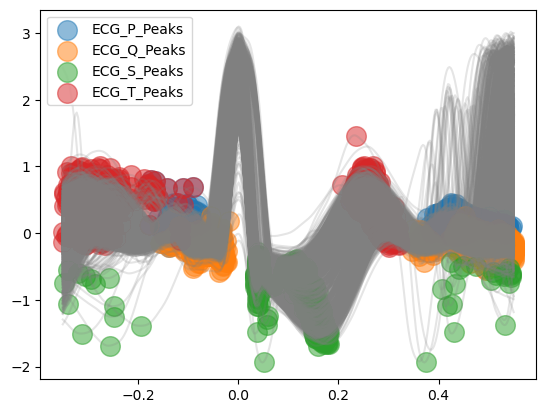

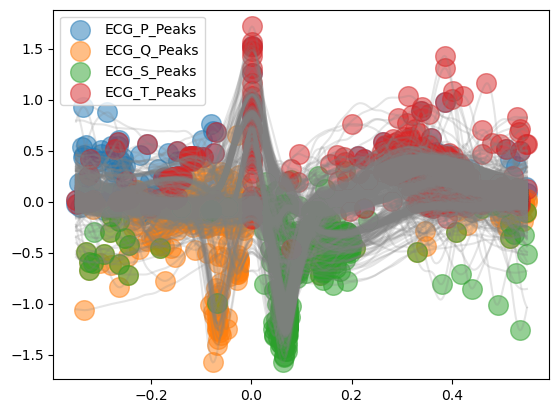

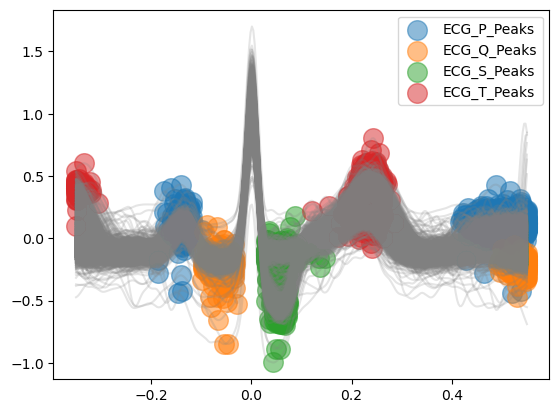

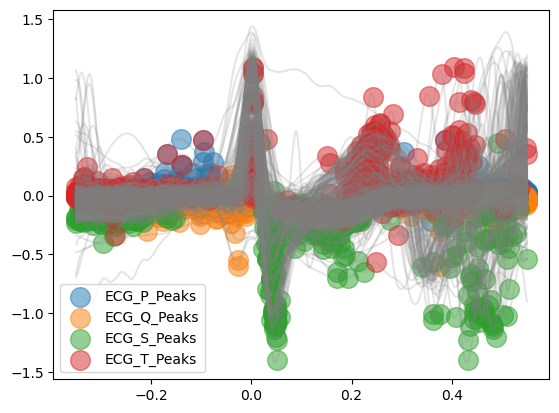

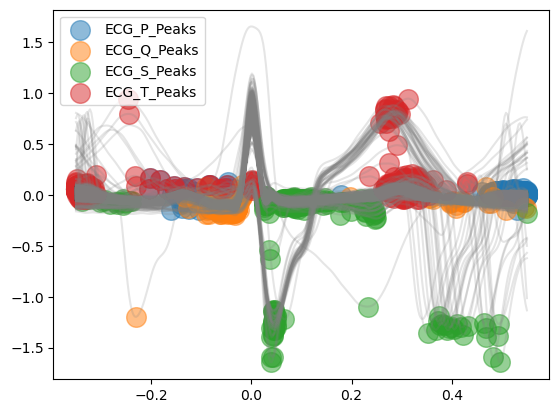

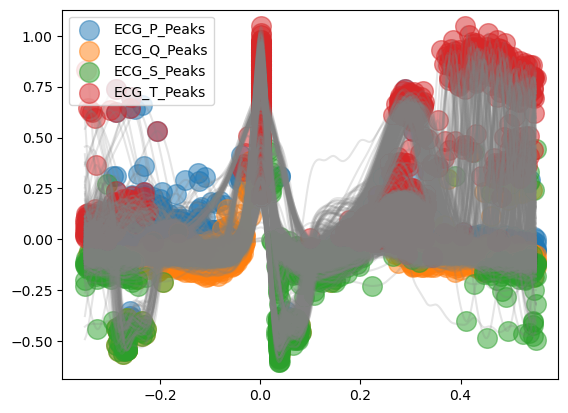

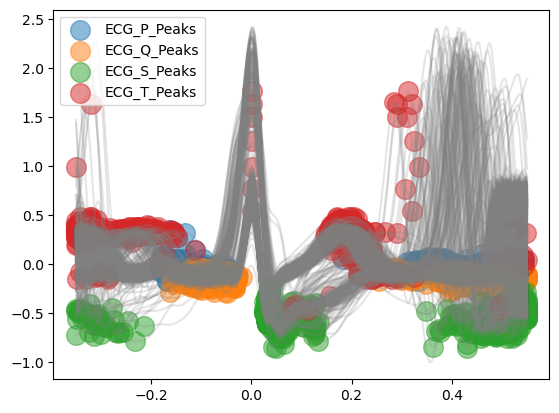

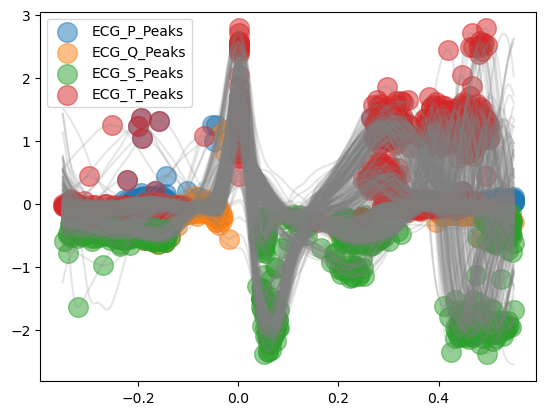

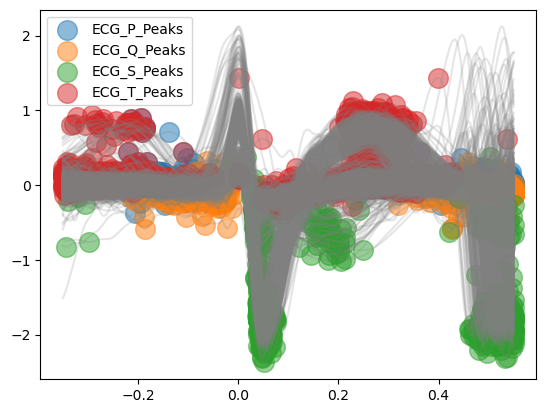

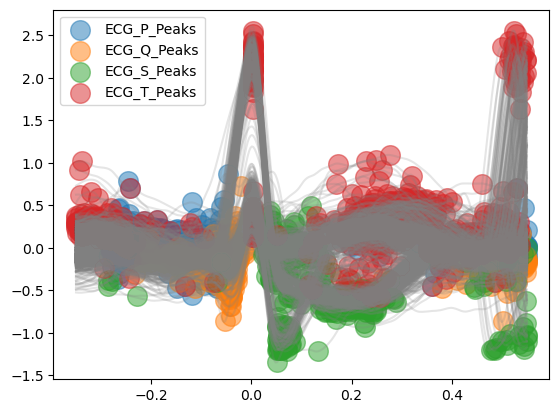

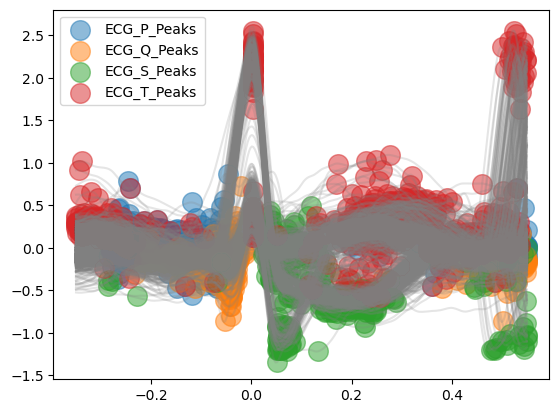

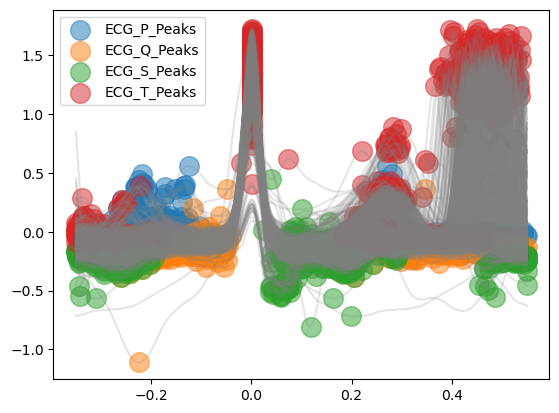

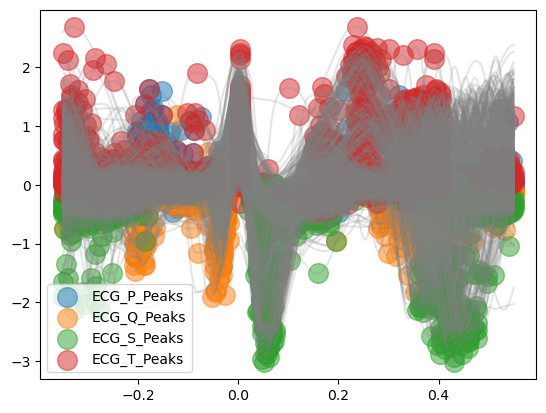

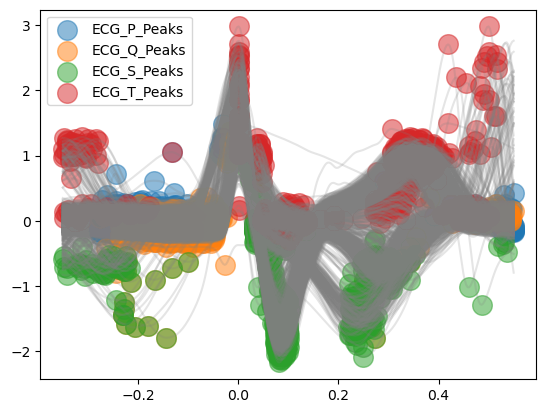

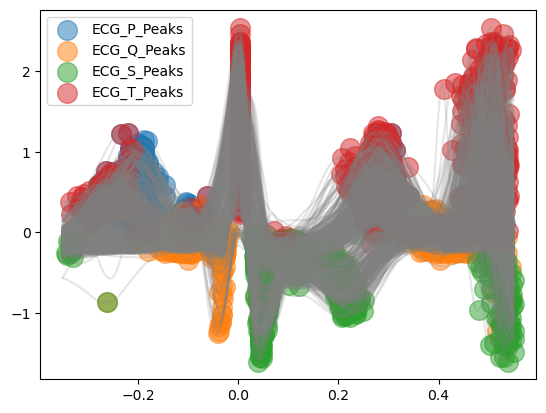

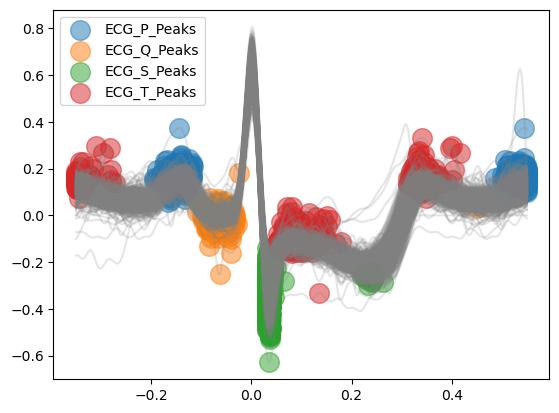

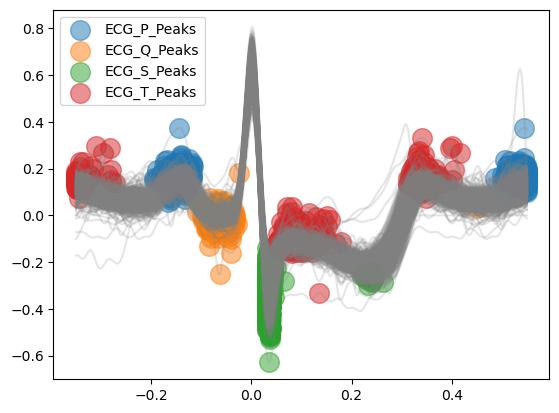

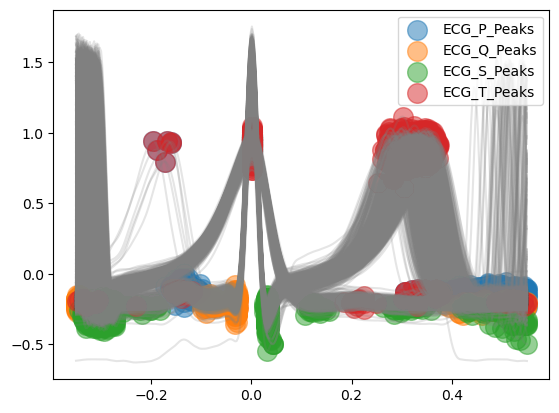

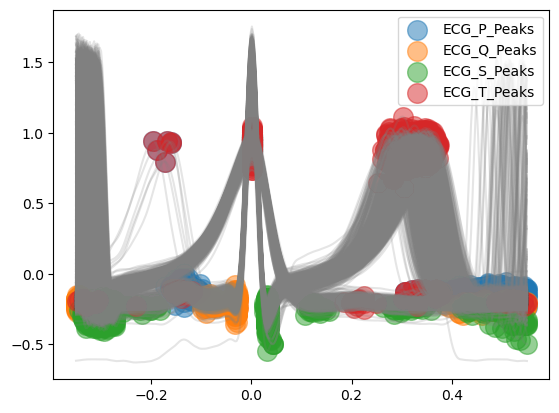

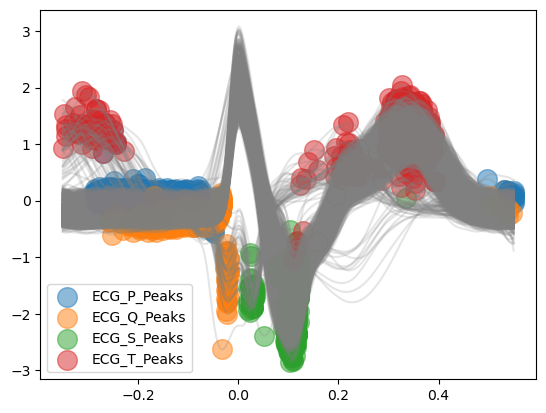

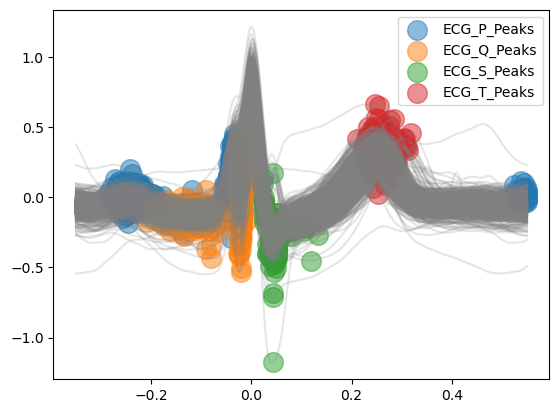

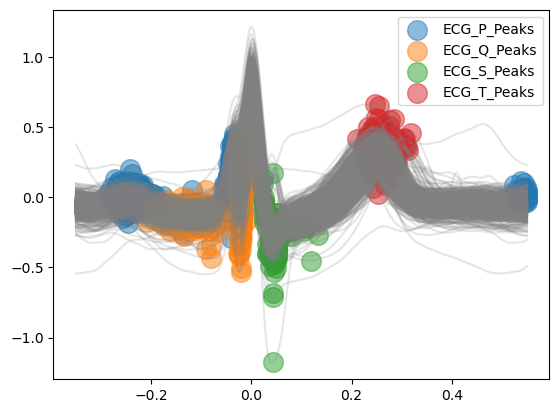

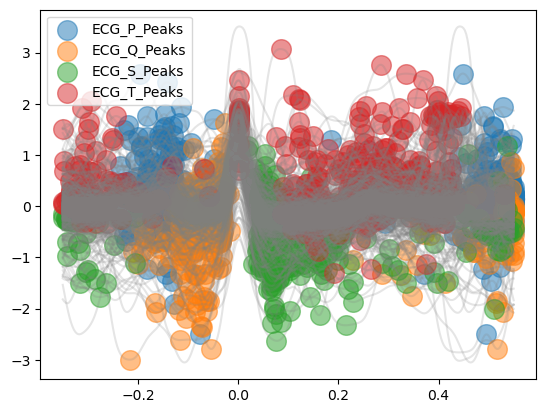

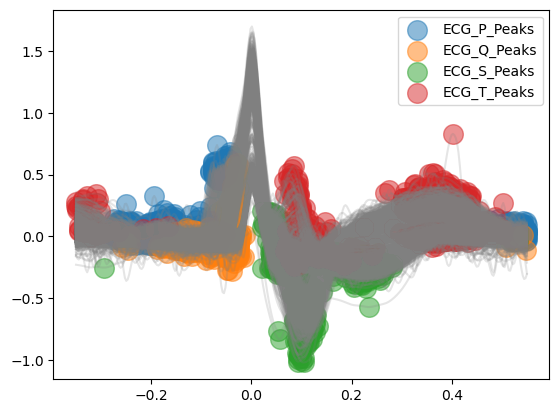

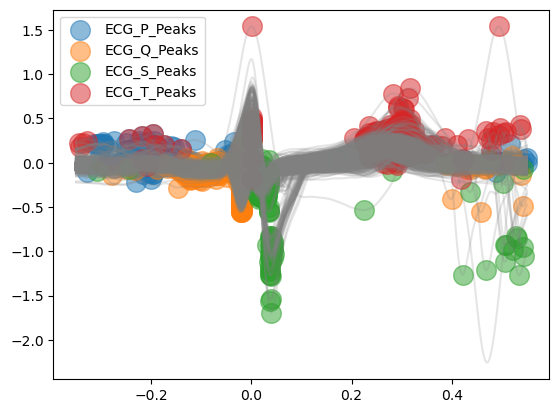

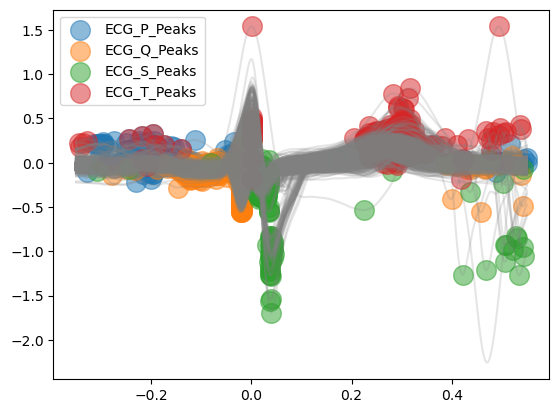

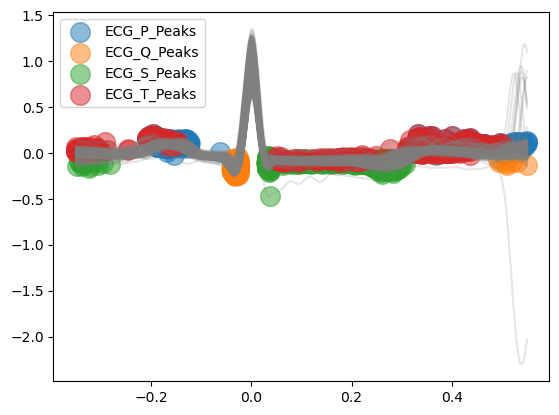

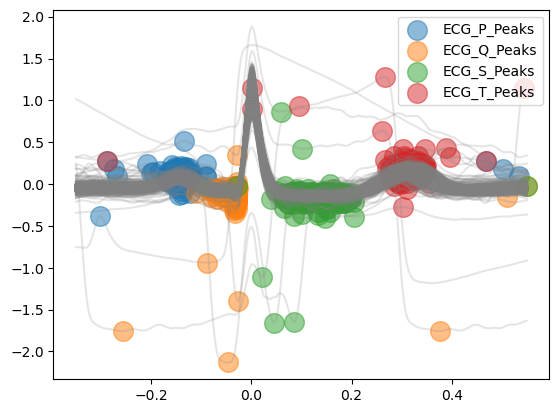

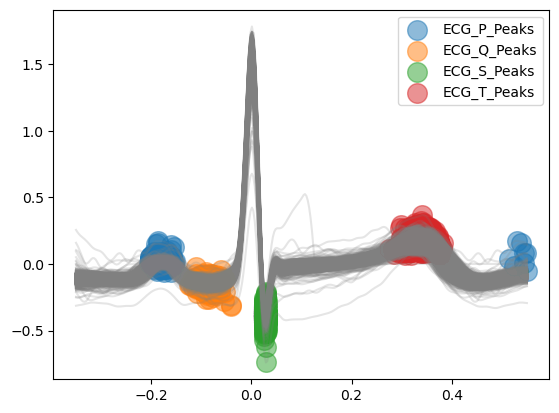

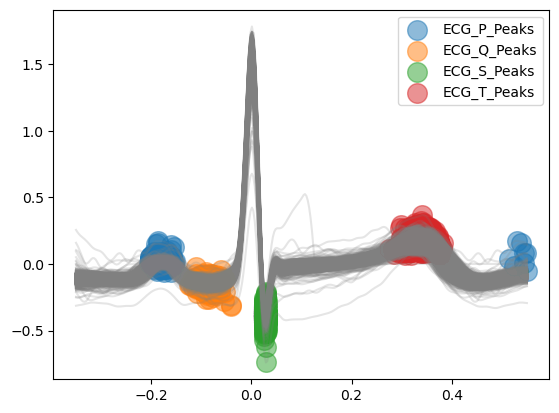

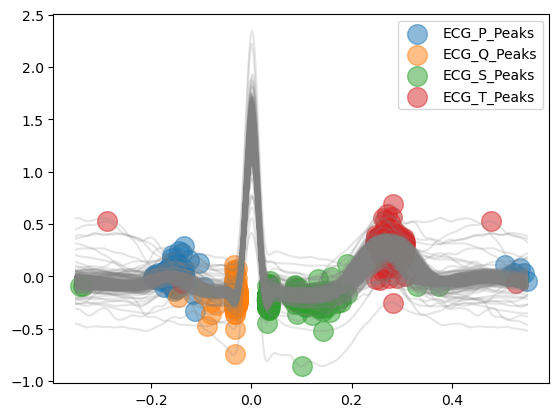

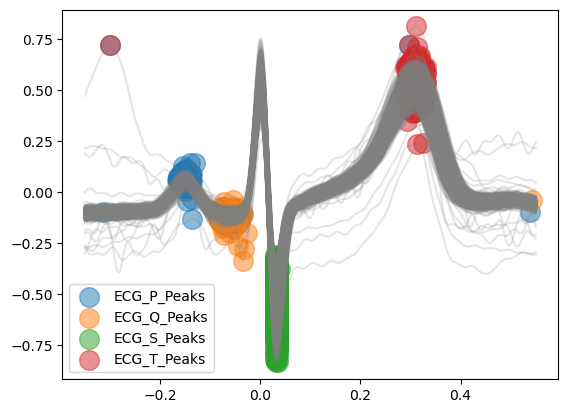

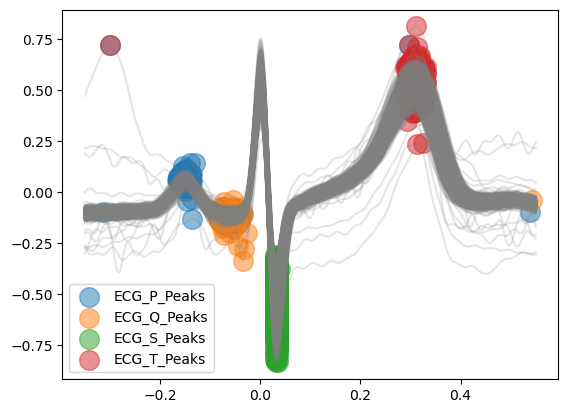

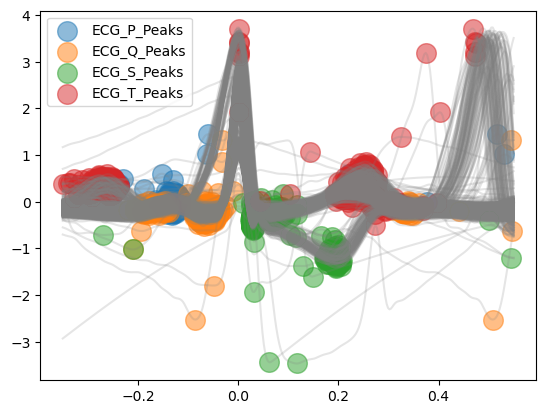

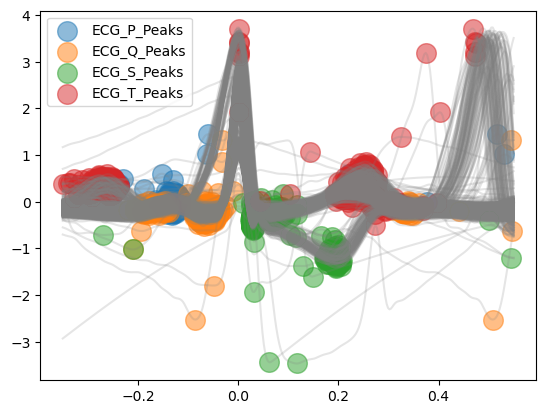

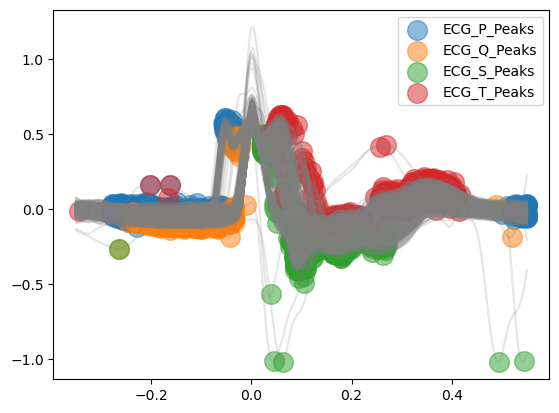

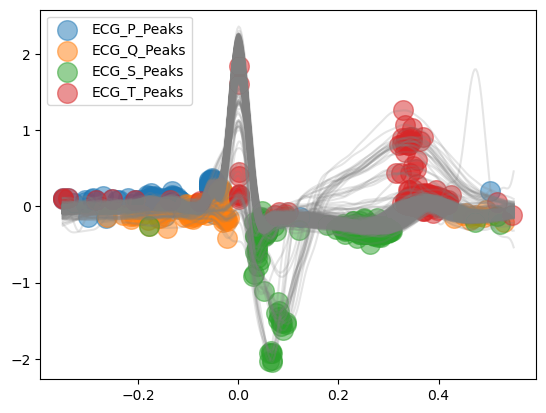

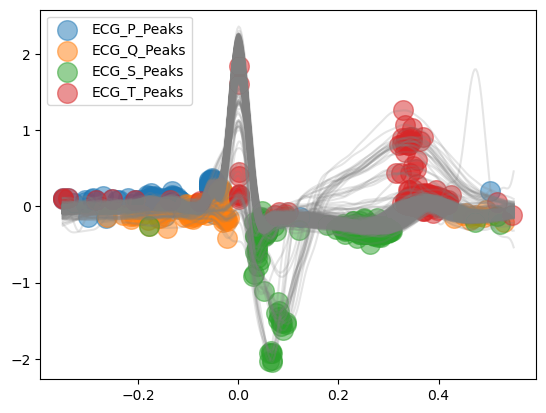

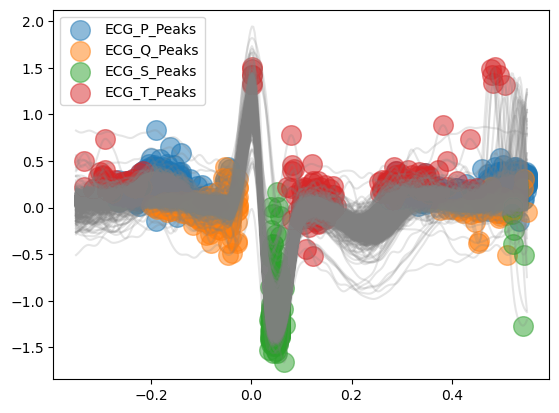

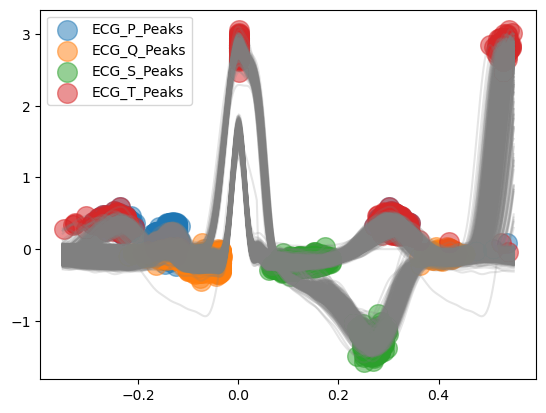

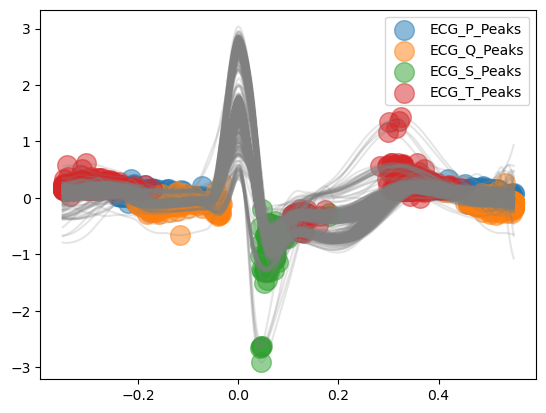

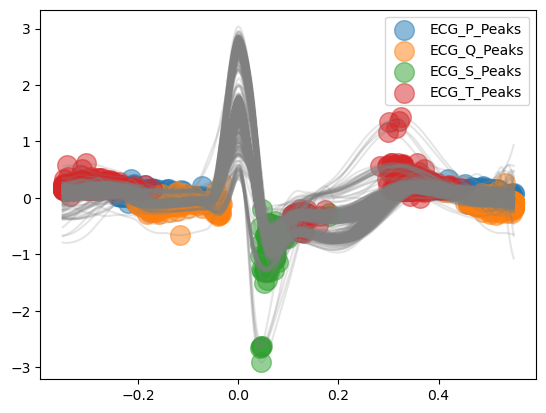

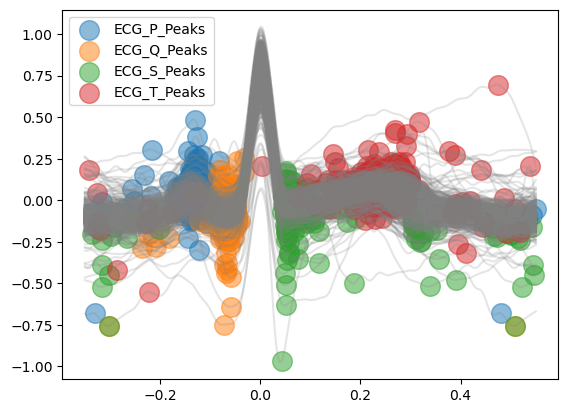

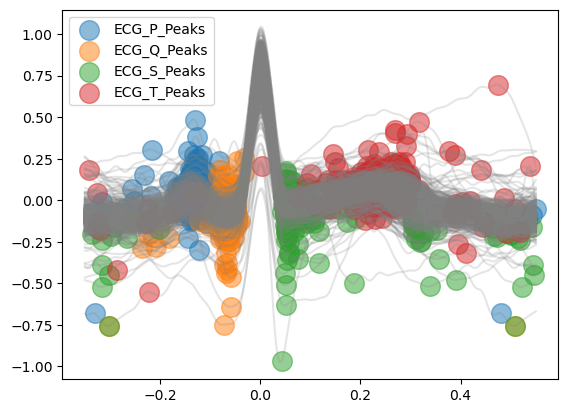

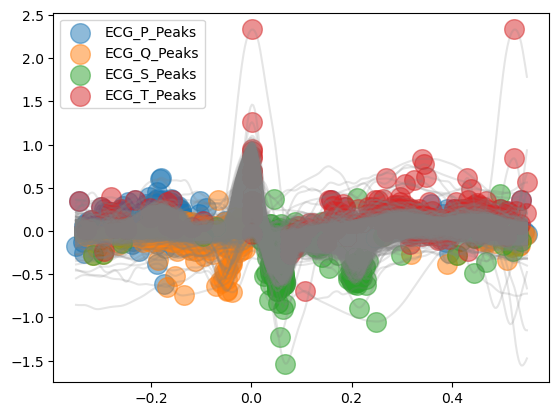

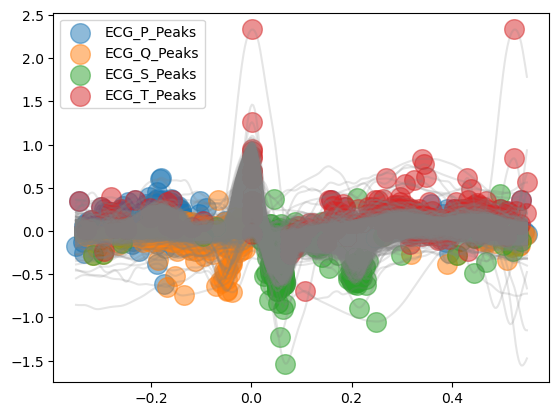

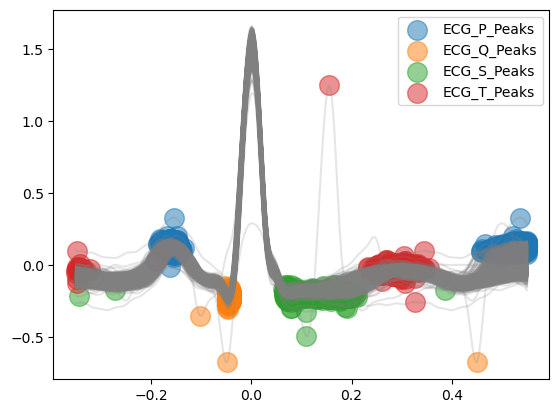

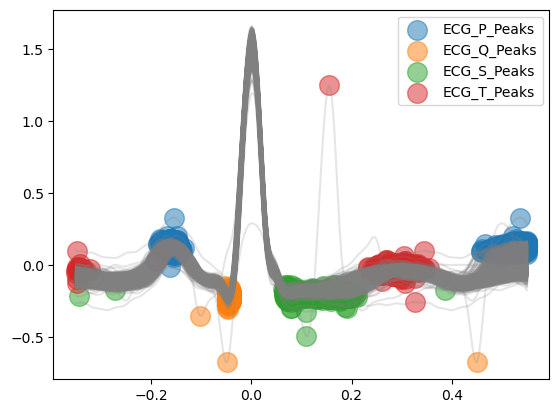

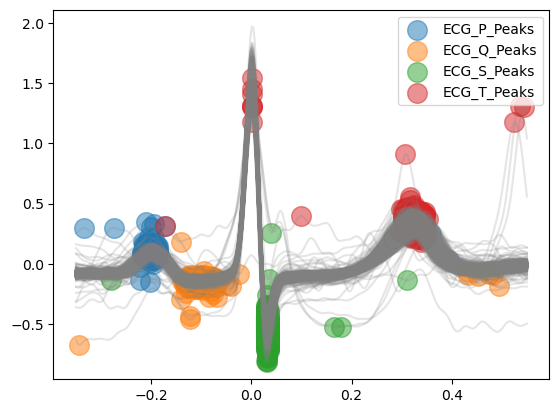

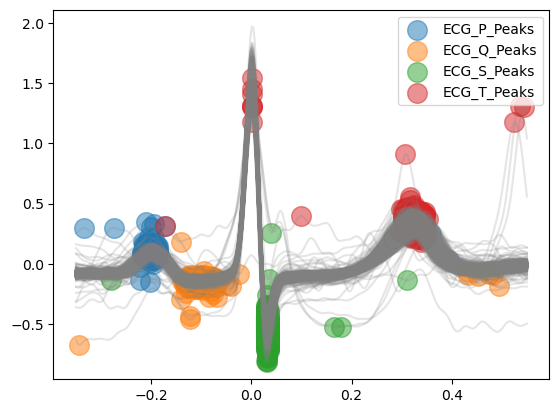

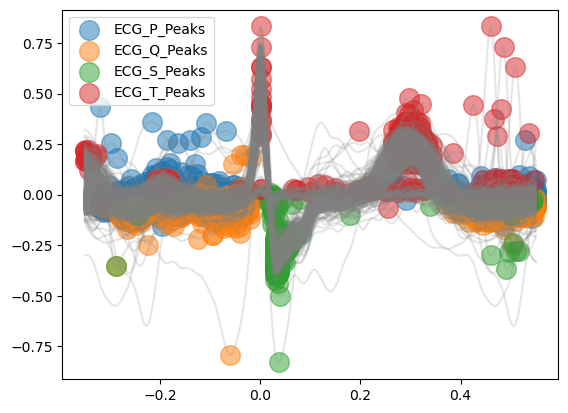

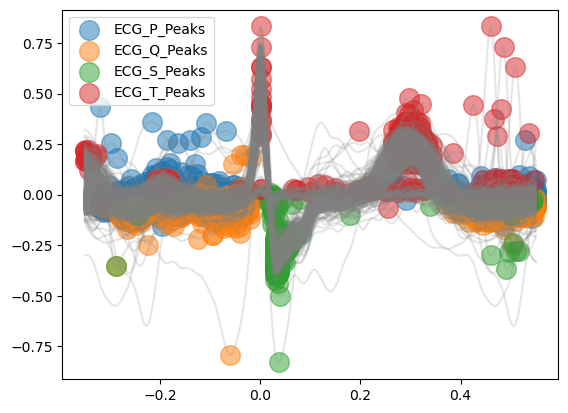

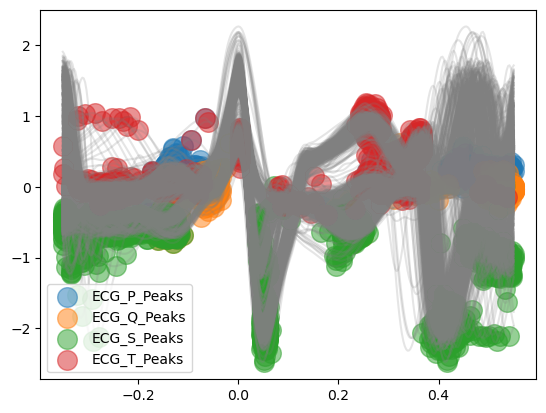

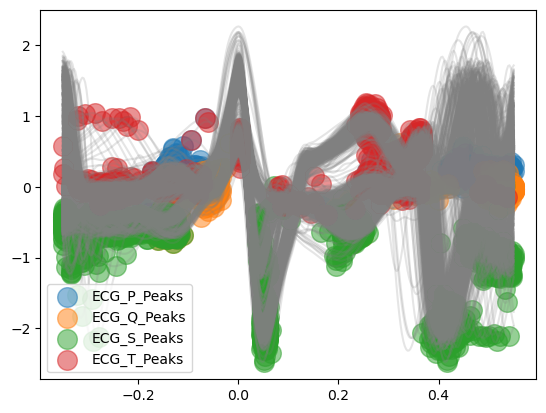

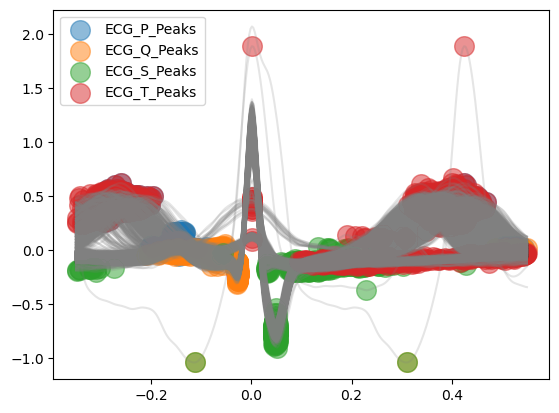

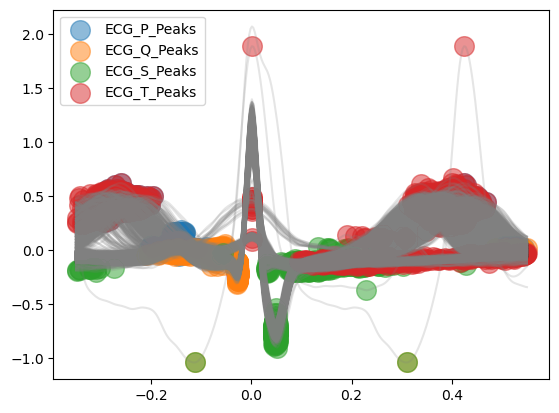

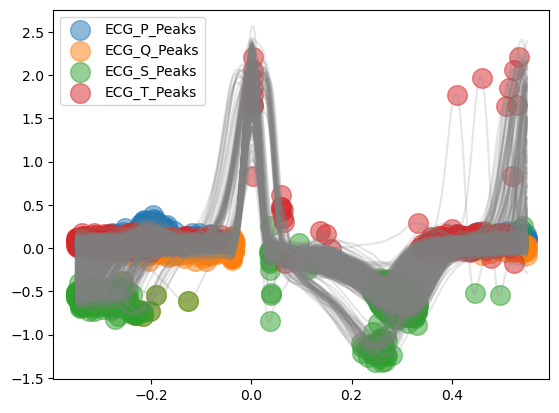

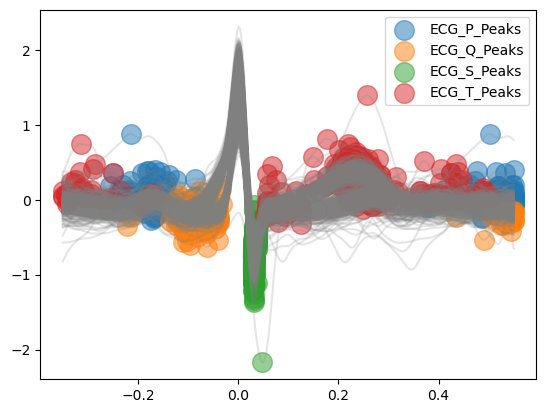

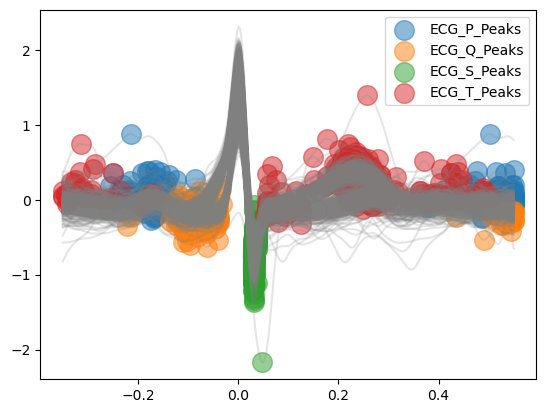

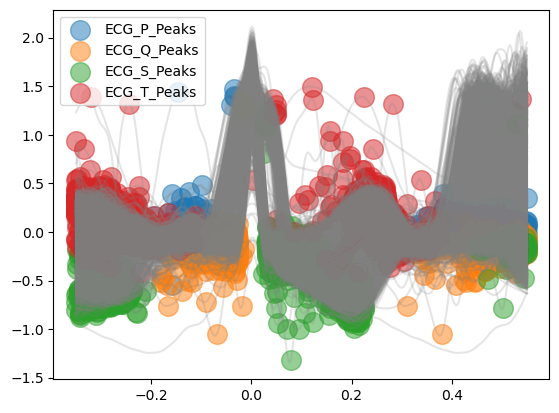

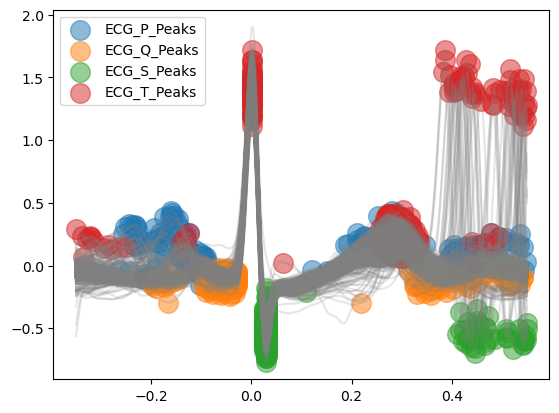

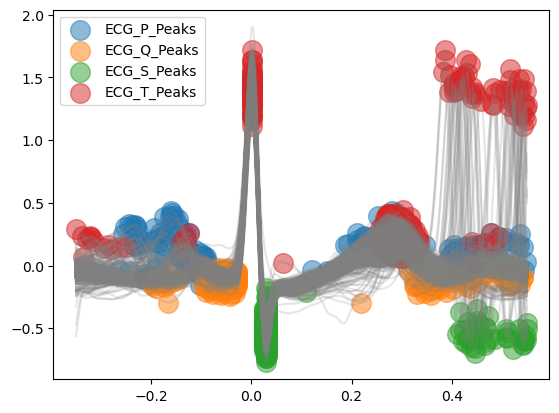

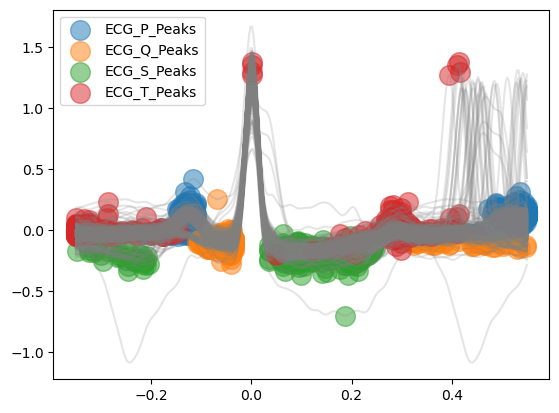

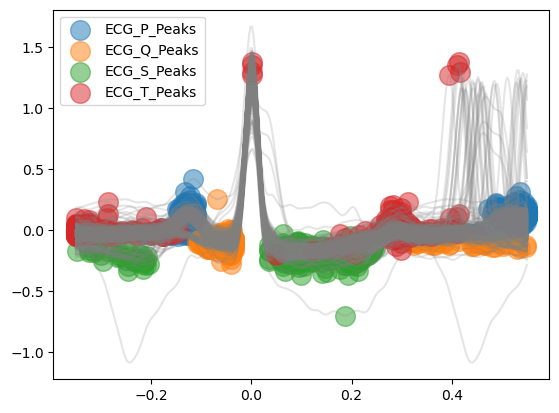

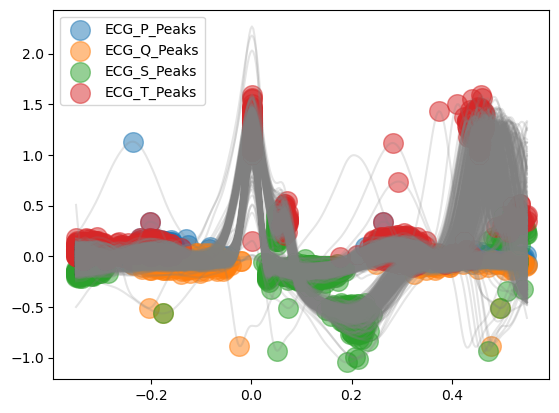

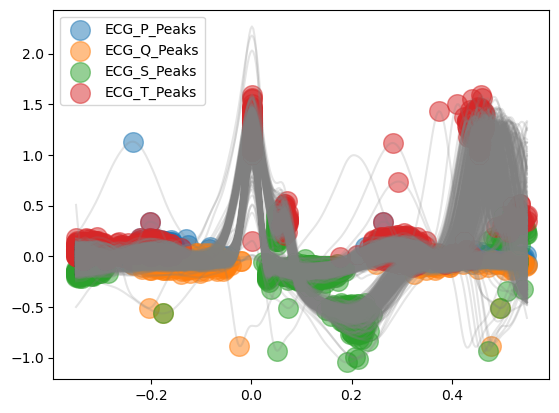

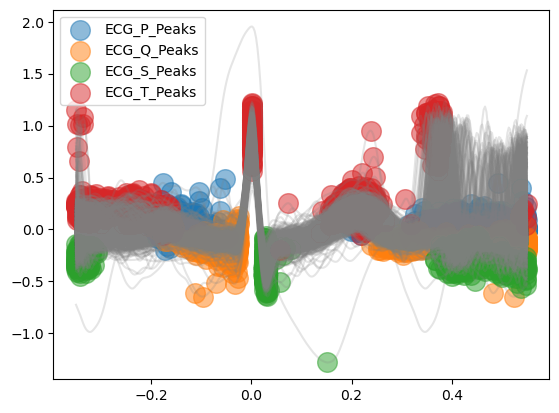

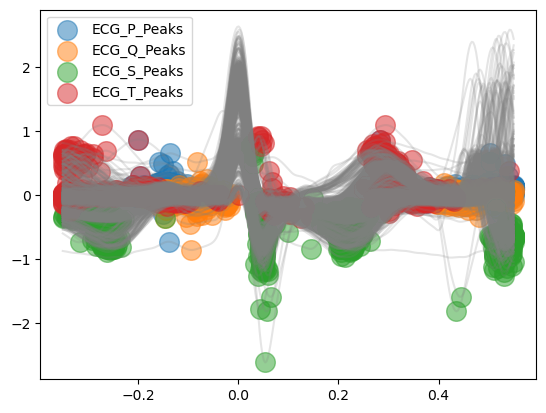

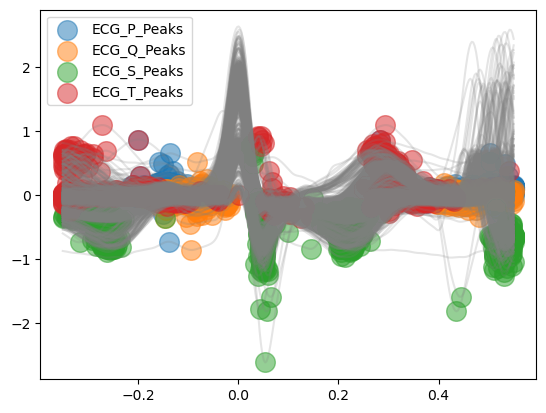

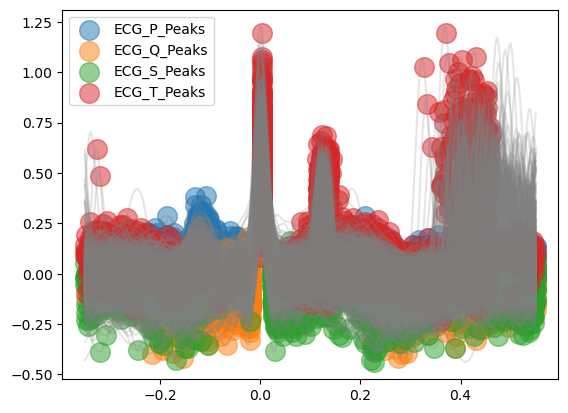

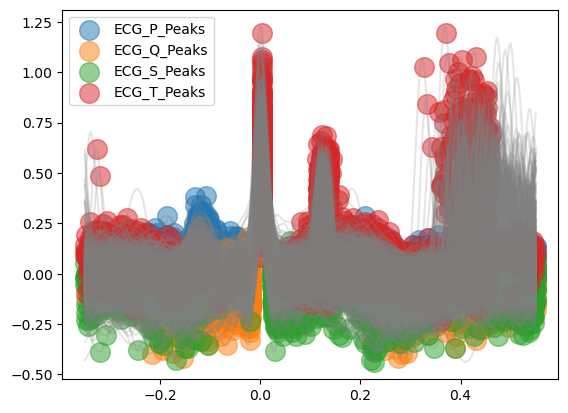

In [22]:
import pandas as pd

# Initialize lists for data collection
for participant, file in enumerate(data_files):
    # Read the ECG data and annotations for each file
    ecg, anno, waves, analysis = read_file(file, participant)

    # Check for and process additional recordings
    additional_path = database_path + "x_mitdb/"
    additional_file = "x_" + file.replace(database_path, "")
    if additional_file in os.listdir(additional_path):
        print("  - Additional recording detected.")
        ecg_add, anno_add, waves_add, analysis_add = read_file(file, participant)
        # Concatenate the dataframes with their respective dataframes
        ecg = pd.concat([ecg, ecg_add], ignore_index=True)
        anno = pd.concat([anno, anno_add], ignore_index=True)
        waves = pd.concat([waves, waves_add], ignore_index=True)
        analysis = pd.concat([analysis, analysis_add], ignore_index=True)

    # Calculate the length of the lists in the first row (assuming all lists are the same length)
    list_length = len(waves.iloc[0]['ECG_P_Peaks'])

    # Repeat the constant values for each element in the lists
    repeated_data = pd.DataFrame({
        'Participant': waves['Participant'].repeat(list_length),
        'Sampling_Rate': waves['Sampling_Rate'].repeat(list_length),
        'Database': waves['Database'].repeat(list_length),
    })

    # Reset index to allow concatenation
    repeated_data = repeated_data.reset_index(drop=True)

    # Expand each of the list columns
    flat_waves = {
        'ECG_P_Peaks': [item for sublist in waves['ECG_P_Peaks'] for item in sublist],
        'ECG_Q_Peaks': [item for sublist in waves['ECG_Q_Peaks'] for item in sublist],
        'ECG_S_Peaks': [item for sublist in waves['ECG_S_Peaks'] for item in sublist],
        'ECG_T_Peaks': [item for sublist in waves['ECG_T_Peaks'] for item in sublist],
        'ECG_P_Onsets': [item for sublist in waves['ECG_P_Onsets'] for item in sublist],
        'ECG_T_Offsets': [item for sublist in waves['ECG_T_Offsets'] for item in sublist],
    }

    # Convert the expanded data into a DataFrame
    flat_waves_df = pd.DataFrame(flat_waves)

    # Concatenate the constant and expanded data into a final flattened DataFrame
    flattened_waves = pd.concat([repeated_data, flat_waves_df], axis=1)

    # Concatenate each participant's data into a single DataFrame
    all_ecg = pd.concat([all_ecg, ecg], ignore_index=True)
    all_anno = pd.concat([all_anno, anno], ignore_index=True)
    all_waves = pd.concat([all_waves, flattened_waves], ignore_index=True)
    all_analysis = pd.concat([all_analysis, analysis], ignore_index=True)

data_dir = "data/"
os.makedirs(data_dir, exist_ok=True)  # Ensure the data directory exists
all_ecg.to_csv("data/ecg" + ".csv")
all_anno.to_csv("data/rpeaks" + ".csv")
all_waves.to_csv("data/waves" + ".csv")
all_analysis.to_csv("data/analysis" + ".csv")

In [23]:
def process_header(data, participant):
    # Initialize an empty dictionary to hold the structured data
    structured_data = {
            "Participant": f"MIT-Arrhythmia_{participant:02d}",
            "Age": None,
            "Gender": None,
            "Medications": None,
            "Comment": None
        }

    # Process the first line for age, gender, and other identifiers
    identifiers = data[0].split()
    structured_data["Age"] = int(identifiers[0])
    structured_data["Gender"] = identifiers[1]

    # Process the second line for medication information
    if data[1].lower() == "none":
        structured_data["Medications"] = pd.NA  # Use pandas NA for missing values
    else:
        # Remove quotation marks and assign to Medications
        structured_data["Medications"] = data[1].replace('"', '')

        print(structured_data["Medications"])

    # Combine the remaining list elements into a single comment string
    structured_data["Comment"] = ' '.join(data[2:]).replace('"', '').replace('  ', ' ')

    return structured_data

In [24]:
def process_all_headers(data_files):
    # List to hold data for all participants
    all_participants_info = []

    for participant, file in enumerate(data_files):
        # Remove the '.dat' extension and use the file name to read the header
        header = wfdb.rdheader(file[:-4])

        # Process the header comments to extract structured information
        if header.comments:  # Ensure there are comments to process
            info = process_header(header.comments, participant)
            all_participants_info.append(info)

    # Convert the list of dictionaries to a DataFrame
    df = pd.DataFrame(all_participants_info)


    return df

In [25]:
# List all .dat files in the dataset directory
data_files = [os.path.join(database_path, f) for f in os.listdir(database_path) if f.endswith('.dat')]

# Process all headers and get a DataFrame
df_participants_info = process_all_headers(data_files)

# Save to CSV
df_participants_info.to_csv("data/info.csv", index=True)

Digoxin
Digoxin, Quinaglute
Digoxin, Quinaglute
Digoxin, Hydrochlorthiazide, Inderal, KCl
Digoxin, Dilantin
Digoxin, Quinidine
Digoxin, Norpace
Digoxin, Hydrochlorthiazide, Inderal, KCl
Coumadin, Digoxin, Heparin, Hygroton, Lasix
Digoxin, Lasix, Quinidine
Inderal
Digoxin, Pronestyl
Digoxin
Digoxin, Lasix
Digoxin, Nitropaste, Pronestyl
Digoxin, Pronestyl
Digoxin
Aldomet, Inderal
Diapres
Diapres, Xyloprim
Digoxin
Digoxin, Isordil, Quinidine
Digoxin, Norpace
Pronestyl
Quinidine
Digoxin, Isordil, Nitropaste
Digoxin, Quinaglute
Digoxin, Lasix, Pronestyl
Digoxin, Inderal
Aldomet, Inderal
Dilantin
Digoxin
Dilantin
Digoxin
Hydrochlorthiazide, Lasix
Aldomet, Hydrodiuril, Inderal
Digoxin, Quinidine
